In [1]:
#autograd
#데이터에 대한 정답과 예측한 결과간의 차이를 산술적으로 표현한 것을 거리, 거리들의 평균을 오차 라고함
#오차를 최소화하기 위한 알고리즘이 gradient descent
#오차를 수학 함수로 표현한 후 미분하여 함수의 gradient를 구해서 오차의 최솟값이 있는 방향으로 나아감

import torch
w = torch.tensor(1.0,requires_grad = True) # requires_grad 를 True로 설정하면 파이토치의 autograd기능이 자동으로 w.grad에 저장됨

a = w*3

In [3]:
l = a**2

In [4]:
l.backward()
print('l을w로 미분한 값은 {}'.format(w.grad))

l을w로 미분한 값은 18.0


In [5]:
import pickle # 피클은 파이썬 객체를 파일형태로 저장할 때 쓰는 패키지
import matplotlib.pyplot as plt

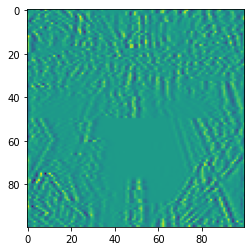

In [12]:
broken_image = torch.FloatTensor(pickle.load(open('./3-min-pytorch/03-파이토치로_구현하는_ANN/broken_image_t.p','rb'),encoding = 'latin1'))
#현재 broken_image는 100*100모양의 행렬이 10,000으로 표현되어있는 상황
plt.imshow(broken_image.view(100,100)) # 따라서 100,100으로 view해준다.

In [13]:
def weird_function(x,n_iter = 5):
    h = x
    filt = torch.tensor([-1./3,1./3,-1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_1 = torch.cat((zero_tensor,h[:-1]),0)
        h_r = torch.cat((h[1:],zero_tensor),0)
        h = filt[0]*h + filt[2]*h_1 + filt[1]*h_r
        if i%2 == 0:
            h = torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
    return h

In [15]:
def distance_loss(hypothesis,broken_image):
    return torch.dist(hypothesis,broken_image)
#torch.dist 는 두 텐서 사이의 거리를 구하는 함수임

In [16]:
random_tensor = torch.randn(10000,dtype = torch.float) # random tensor를 broken image 와 같은 크기로 넣는다
lr = 0.8 # learning rate 설정

loss at 0 = 0.021167738363146782
loss at 1000 = 0.021168064326047897
loss at 2000 = 0.021168192848563194
loss at 3000 = 0.02116810716688633
loss at 4000 = 0.02116810902953148
loss at 5000 = 0.02116812951862812
loss at 6000 = 0.021168408915400505
loss at 7000 = 0.021168498322367668
loss at 8000 = 0.02116873674094677
loss at 9000 = 0.021168800070881844
loss at 10000 = 0.02116885595023632
loss at 11000 = 0.021168945357203484
loss at 12000 = 0.02116866409778595
loss at 13000 = 0.021168656647205353
loss at 14000 = 0.021168485283851624
loss at 15000 = 0.02116839960217476
loss at 16000 = 0.021168438717722893
loss at 17000 = 0.02116839587688446
loss at 18000 = 0.021168339997529984
loss at 19000 = 0.021168425679206848
loss at 20000 = 0.021168438717722893
loss at 21000 = 0.02116868458688259
loss at 22000 = 0.021168405190110207
loss at 23000 = 0.021168362349271774
loss at 24000 = 0.021168341860175133
loss at 25000 = 0.021168507635593414
loss at 26000 = 0.021168459206819534
loss at 27000 = 0.02116

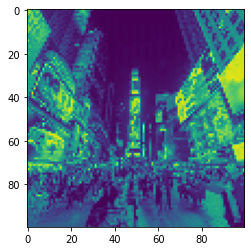

In [19]:
for i in range(20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis,broken_image)
    loss.backward()
    #파이토치는 모델 속 변수들이 지나가는 길인 그래프를 생성한다
    #이번 에제에서는 직접 경사하강법을 구현하기 때문에 torch.no_grad()함수를 이용해 자동 게산을 비활성화 해야함
    with torch.no_grad():
        random_tensor = random_tensor -lr*random_tensor.grad
    if i % 1000 ==0:
        print('loss at {} = {}'.format(i,loss.item()))

plt.imshow(random_tensor.view(100,100).data)

In [ ]:
# 이 코드는 auto grad를 이용해서 오염된 이미지를 원본으로 복구시키는 작업을 보여주고 있으며, 원본이 함수에 들어가서 오염된 이미지가 나왔고,
# 랜덤 텐서가 함수에 들어가서 오염된이미지와 같게 나온다면 랜덤텐서가 원본이미지와 비슷할 것이라는 가설을 가지고 있다.